In [73]:
import pandas as pd
from tqdm import tqdm

In [83]:
df = pd.read_csv("./subreddits23/nuclear_comments.csv")

In [88]:
def filter_nuclear(x):
    if ("nuclear" in str(x).lower() and "energy" in str(x).lower()) and len(str(x).split()) < 120:
        return True
    else:
        return False

In [89]:
nuclear_energy_related = df[df["body"].apply(lambda x: filter_nuclear(x))]

In [90]:
nuclear_energy_related["body"].iloc[3]

'strontium 90, with a 28.8 year half life outputs 0.94 watts per gram. Even at 50%, you are looking at 0.49 watts per gram. A standard drone needs 50 to 600kw and to be powered by sr90, you will need 100 to 1200 kg. A betavoltaic will nearly double the weight.\n\nRadioisotope has great specific energy and can be made small, but its specific power tends to run on the low side.\n\nAnd yes, I am an engineer with an undergrad in nuclear and masters in materials'

In [78]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [71]:
input_list = []
for i in range(20):
    input_comment = nuclear_energy_related["body"].iloc[i]
    input_list.append(input_comment)
input_list = [e.replace("&gt;", "") for e in input_list]

In [72]:
for text in input_list:
    print(text)
    print(f"RESULTS: {pipe(str(text))}")
    print("============================")

I'm a physicist and environmentalist in favor of nuclear fission energy.  Let the Nuclear Renaissance begin!
RESULTS: [{'label': 'POS', 'score': 0.9134412407875061}]
'In the wake of Copenhagen, an unheralded but hard-fought "No Nukes" victory has moved us closer to a green-powered Earth... the UniStar Nuclear Energy front group asked the Nuclear Regulatory Commission to delay its application to build a reactor... near Syracuse... Throughout the U.S., while the corporate media hypes a "renaissance" of new nukes, facts on the ground say the opposite is happening...'
RESULTS: [{'label': 'NEU', 'score': 0.8076153993606567}]
This is only making the news because it's on a nuclear site. Accidents like these happen every day.

Also, the article is factually wrong: France only depends on nuclear for 40% of its energy[1] (though more if you're only looking at electricity).

[1] http://ec.europa.eu/energy/energy_policy/doc/factsheets/mix/mix_fr_en.pdf
RESULTS: [{'label': 'NEG', 'score': 0.7988107

In [97]:
from tqdm.auto import tqdm
sentiment = []
score = []
for i in tqdm(range(len(nuclear_energy_related))):
    text = str(nuclear_energy_related['body'].iloc[i])
    try:
        results = pipe(text)
        sentiment.append(results[0]['label'])
        score.append(results[0]['score'])
    except:
        sentiment.append('None')
        score.append(-1)

  0%|          | 0/5248 [00:00<?, ?it/s]

In [98]:
nuclear_energy_related['label'] = sentiment
nuclear_energy_related['score'] = score

C:\Users\yongc\AppData\Local\Temp\ipykernel_19696\1422917312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_energy_related['label'] = sentiment
C:\Users\yongc\AppData\Local\Temp\ipykernel_19696\1422917312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_energy_related['score'] = score


In [106]:
new_df = nuclear_energy_related[nuclear_energy_related['label'] != "None"]

In [126]:
df = pd.read_csv('nuclear_dataset.csv')

In [127]:
def year(x):
    return x.split('-')[0]
df['created'] = df['created'].apply(lambda x: year(x))

In [136]:
df = df[df['created'] >= "2013"]

In [137]:
positive = df[df['label'] == "POS"]
neutral = df[df['label'] == "NEU"]
negative = df[df['label'] == "NEG"]

In [142]:
positive.groupby('created').count()['label']

created
2013      8
2014      6
2015     11
2016     16
2017     10
2018     11
2019     53
2020     92
2021    138
2022    156
2023    119
Name: label, dtype: int64

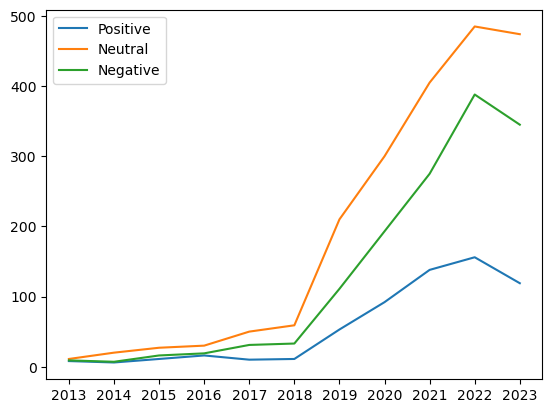

In [146]:
import matplotlib.pyplot as plt
plt.plot(positive.groupby('created').count().index, positive.groupby('created').count()['label'], label='Positive')
plt.plot(neutral.groupby('created').count().index, neutral.groupby('created').count()['label'], label='Neutral')
plt.plot(negative.groupby('created').count().index, negative.groupby('created').count()['label'], label='Negative')
plt.legend()